<a href="https://colab.research.google.com/github/sebitas/3dBasicRunner/blob/master/technical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprovecha al máximo tu suscripción a Colab



[*********************100%%**********************]  1 of 1 completed


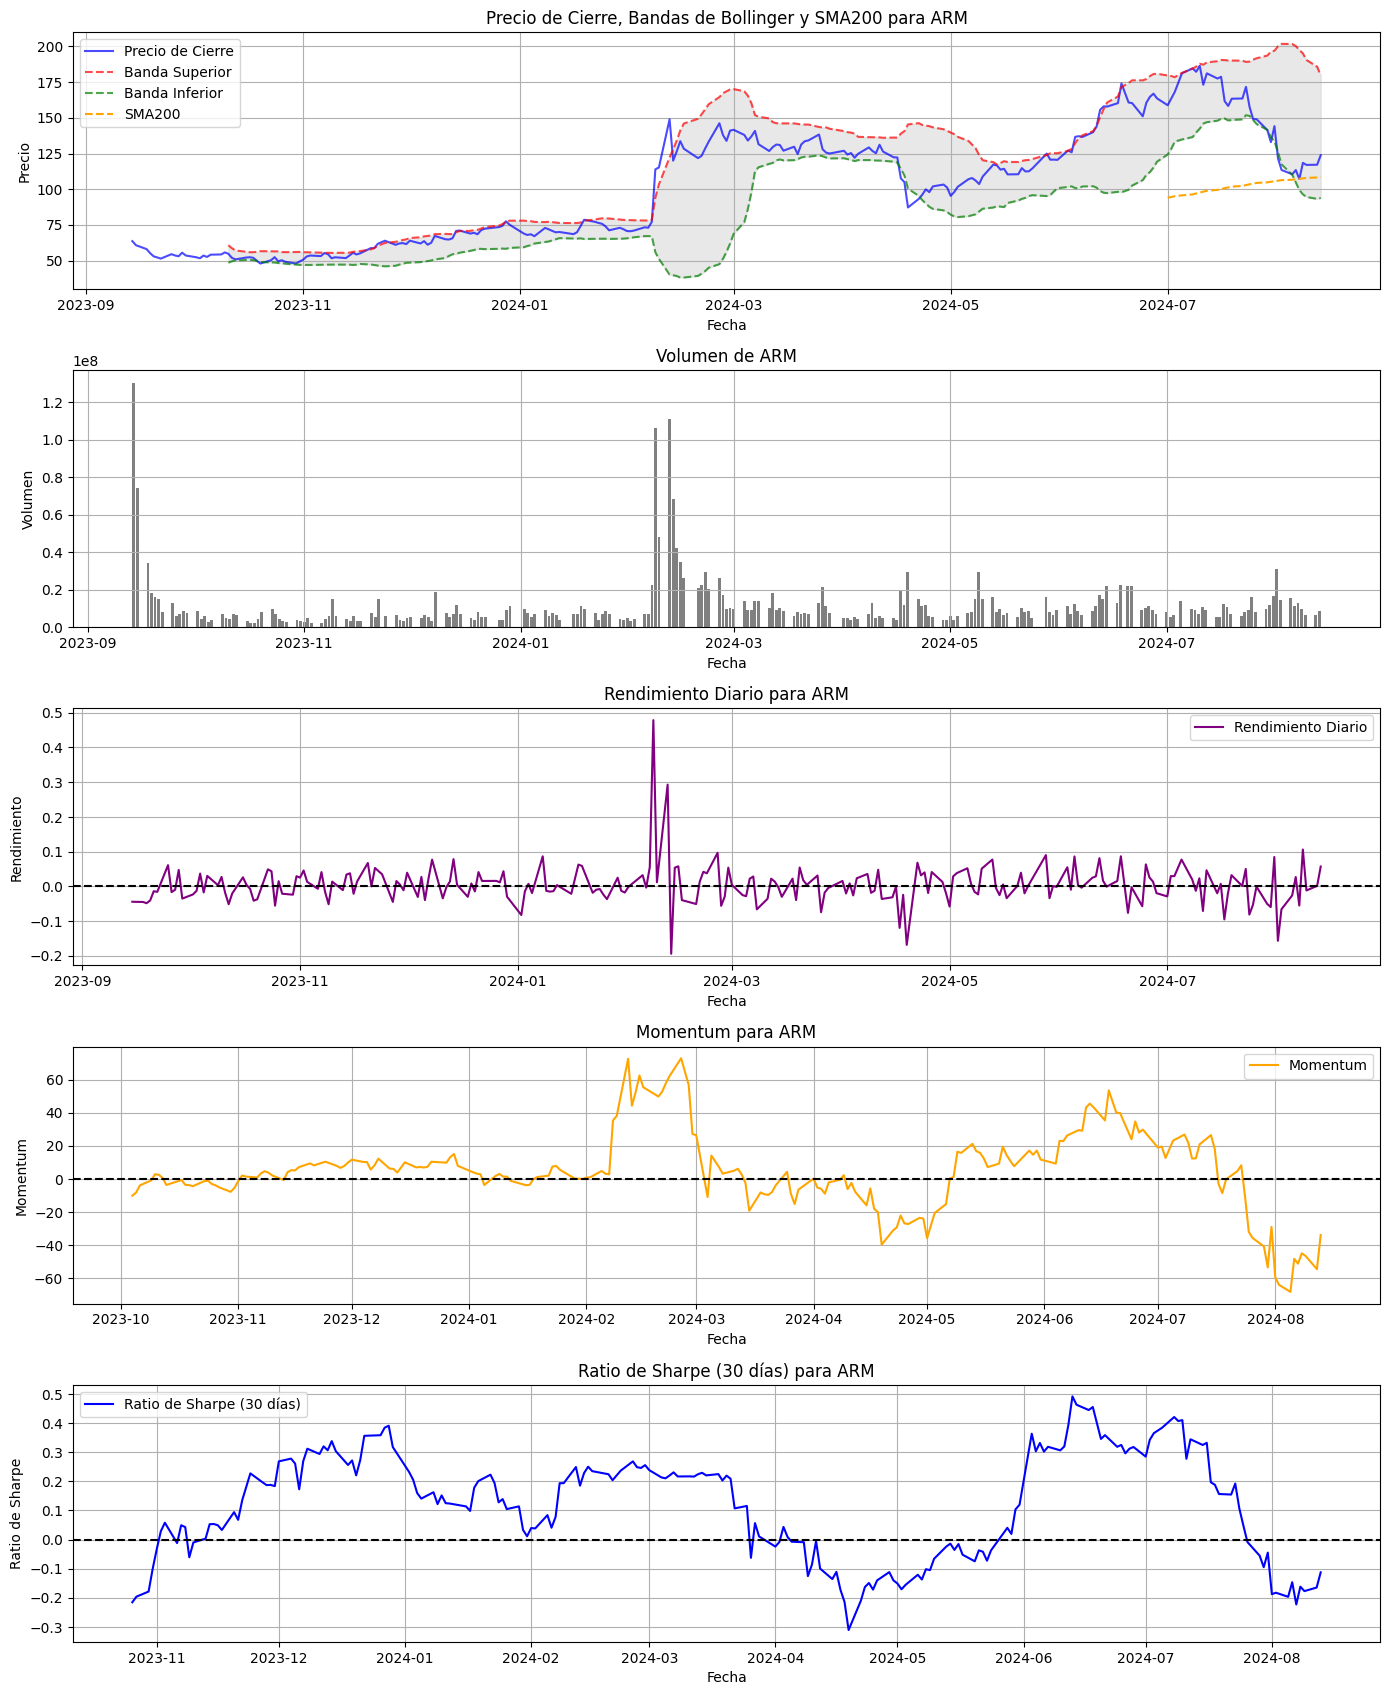

In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular las Bandas de Bollinger
def calculate_bollinger_bands(series, window=20):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)
    return upper_band, lower_band

# Función para calcular el Ratio de Sharpe
def calculate_sharpe_ratio(returns, risk_free_rate=0):
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std()

# Función para calcular el Momentum
def calculate_momentum(series, window=14):
    return series.diff(window)

# Descargar datos desde Yahoo Finance
ticker = "ARM"  # Cambia esto por el ticker de la acción que deseas analizar
df = yf.download(ticker, start="2022-01-01", end="2024-08-14")

# Calcular Bandas de Bollinger
df['Upper_Band'], df['Lower_Band'] = calculate_bollinger_bands(df['Close'])

# Calcular la Media Móvil Simple (SMA) de 200 días
df['SMA200'] = df['Close'].rolling(window=200).mean()

# Calcular el Momentum
df['Momentum'] = calculate_momentum(df['Close'])

# Calcular el Ratio de Sharpe usando una ventana móvil de 30 días
window = 30
df['Returns'] = df['Close'].pct_change()
df['Sharpe_Ratio'] = df['Returns'].rolling(window=window).apply(lambda x: calculate_sharpe_ratio(x.dropna()), raw=False)

# Graficar los datos
plt.figure(figsize=(14, 20))

# Graficar el precio de cierre, Bandas de Bollinger y SMA200
plt.subplot(6, 1, 1)
plt.plot(df.index, df['Close'], label='Precio de Cierre', color='blue', alpha=0.7)
plt.plot(df.index, df['Upper_Band'], label='Banda Superior', color='red', linestyle='--', alpha=0.7)
plt.plot(df.index, df['Lower_Band'], label='Banda Inferior', color='green', linestyle='--', alpha=0.7)
plt.plot(df.index, df['SMA200'], label='SMA200', color='orange', linestyle='--', alpha=1)
plt.fill_between(df.index, df['Lower_Band'], df['Upper_Band'], color='lightgrey', alpha=0.5)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title(f'Precio de Cierre, Bandas de Bollinger y SMA200 para {ticker}')
plt.legend()
plt.grid(True)

# Graficar el volumen
plt.subplot(6, 1, 2)
plt.bar(df.index, df['Volume'], color='gray')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title(f'Volumen de {ticker}')
plt.grid(True)

# Graficar el rendimiento diario
plt.subplot(6, 1, 3)
plt.plot(df.index, df['Returns'], label='Rendimiento Diario', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento')
plt.title(f'Rendimiento Diario para {ticker}')
plt.legend()
plt.grid(True)

# Graficar el Momentum
plt.subplot(6, 1, 4)
plt.plot(df.index, df['Momentum'], label='Momentum', color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Momentum')
plt.title(f'Momentum para {ticker}')
plt.legend()
plt.grid(True)

# Graficar el Ratio de Sharpe
plt.subplot(6, 1, 5)
plt.plot(df.index, df['Sharpe_Ratio'], label='Ratio de Sharpe (30 días)', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Sharpe')
plt.title(f'Ratio de Sharpe (30 días) para {ticker}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
